# Stroke Prediction

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Description

1) id: unique identifier
<br>
<br>
2) gender: "Male", "Female" or "Other"
<br>
<br>
3) age: age of the patient
<br>
<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
<br>
<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
<br>
<br>
6) ever_married: "No" or "Yes"
<br>
<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
<br>
<br>
8) Residence_type: "Rural" or "Urban"
<br>
<br>
9) avg_glucose_level: average glucose level in blood
<br>
<br>
10) bmi: body mass index
<br>
<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
<br>
<br>
12) stroke: 1 if the patient had a stroke or 0 if not
<br>
<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI is the only feature with missing values -- probably due to it not being recorded. This is easily dealt with through imputation

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Number of Strokes')

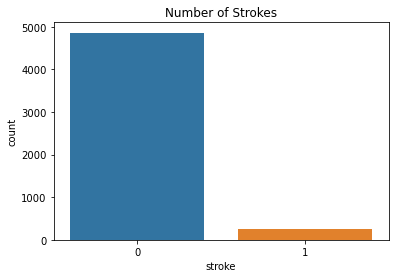

In [6]:
sns.countplot(x='stroke', data=df)
plt.title("Number of Strokes")

In [7]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

The data is unbalanced -- we may want to consider upsampling or downsampling when model building. 

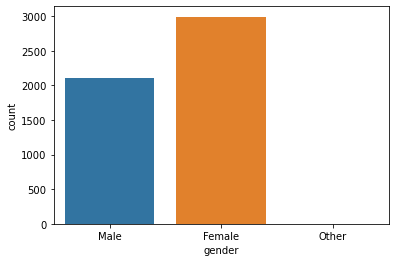

In [8]:
sns.countplot(x='gender', data=df)

In [9]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Text(0.5, 1.0, 'Grouped Bar Plot: Stroke and Gender')

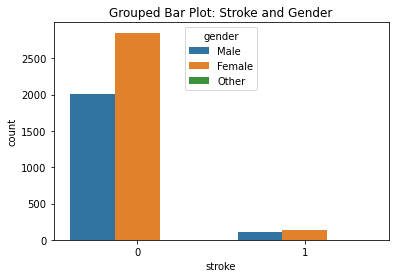

In [10]:
sns.countplot(x='stroke', hue='gender', data=df)
plt.title("Grouped Bar Plot: Stroke and Gender")

Since there's only one person that identified as "Other", it's hard to see whether they had a stroke or not.. 

In [11]:
df.loc[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


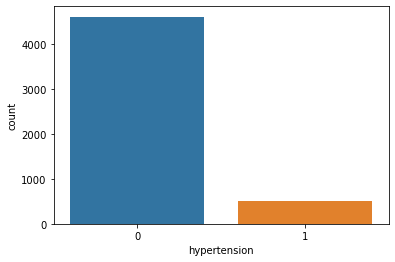

In [12]:
sns.countplot('hypertension', data=df)

Text(0.5, 1.0, 'Grouped Bar Plot: Stroke and Hypertension')

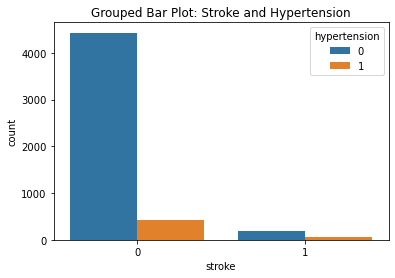

In [13]:
sns.countplot(x='stroke', hue='hypertension', data=df)
plt.title("Grouped Bar Plot: Stroke and Hypertension")

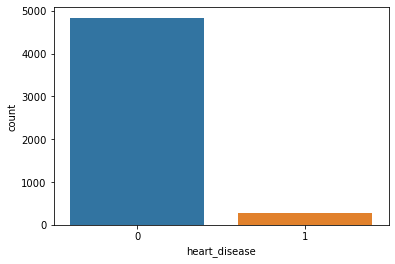

In [14]:
sns.countplot(x='heart_disease', data=df)

Text(0.5, 1.0, 'Grouped Bar Plot: Stroke and Heart Disease')

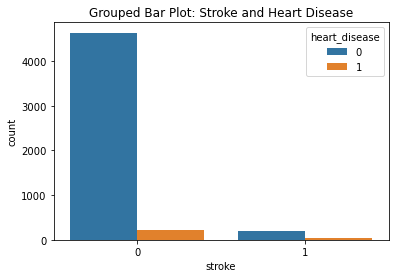

In [15]:
sns.countplot(x='stroke', hue='heart_disease', data=df)
plt.title("Grouped Bar Plot: Stroke and Heart Disease")

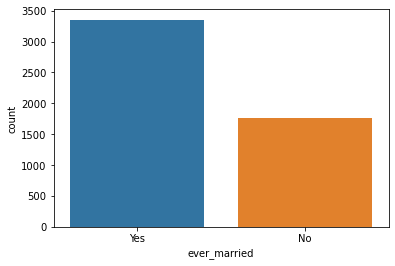

In [16]:
sns.countplot('ever_married', data=df)

Text(0.5, 1.0, 'Grouped Bar Plot: Stroke and Marriage Status')

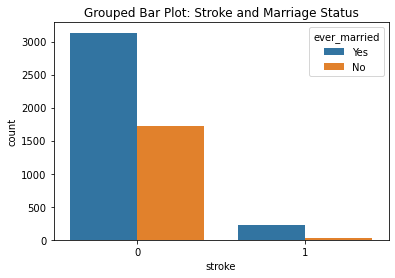

In [17]:
sns.countplot('stroke', hue='ever_married', data=df)
plt.title("Grouped Bar Plot: Stroke and Marriage Status")

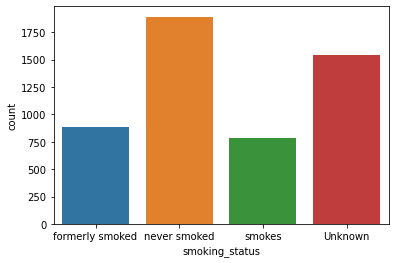

In [18]:
sns.countplot('smoking_status', data=df)

Text(0.5, 1.0, 'Grouped Bar Plot: Stroke and Smoking Status')

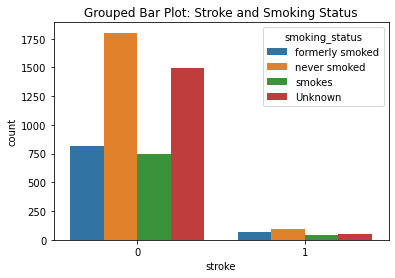

In [19]:
sns.countplot(x='stroke', hue='smoking_status', data=df)
plt.title("Grouped Bar Plot: Stroke and Smoking Status")

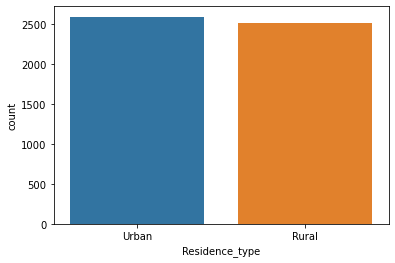

In [20]:
sns.countplot('Residence_type', data=df)

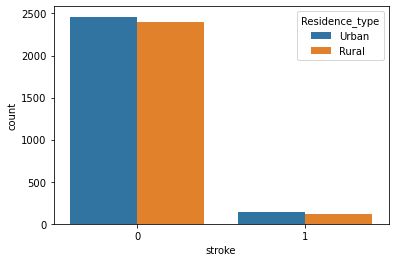

In [21]:
sns.countplot('stroke', hue='Residence_type', data=df)

Text(0.5, 1.0, 'BMI Distribution')

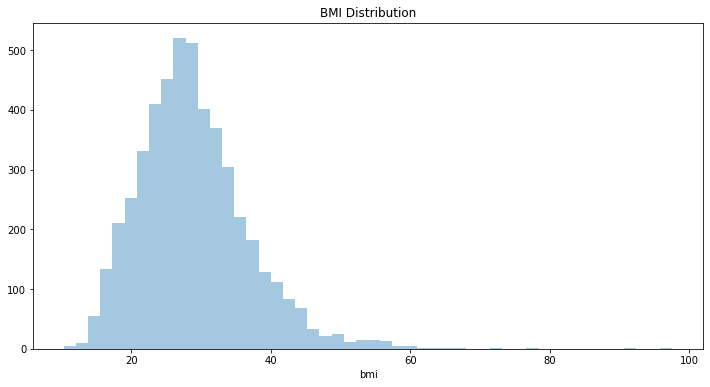

In [22]:
plt.figure(figsize=(12, 6))
sns.distplot(df.bmi, kde=False)
plt.title("BMI Distribution")

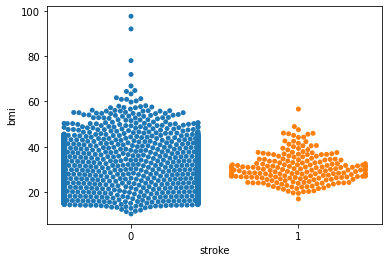

In [23]:
sns.swarmplot(x='stroke', y='bmi', data=df)

In [24]:
All of the strokes in this data occur at between 20-60 BMI levels. Typically adults with BMIs between 19-25 are considered to be at a healthy weight.

SyntaxError: invalid syntax (<ipython-input-24-3697eadc29e2>, line 1)

Text(0.5, 1.0, 'Average Glucose Level Distribution')

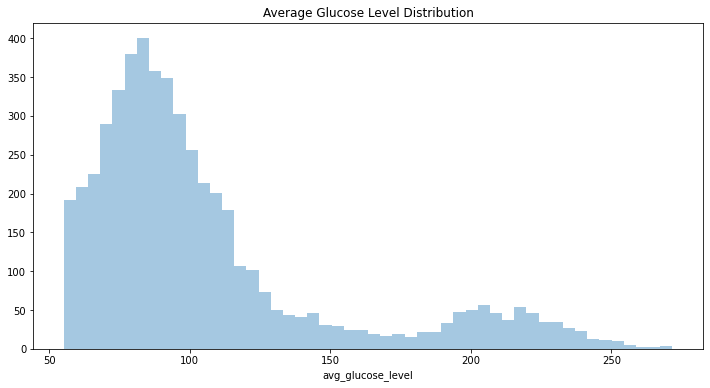

In [25]:
plt.figure(figsize=(12, 6))
sns.distplot(df.avg_glucose_level, kde=False)
plt.title("Average Glucose Level Distribution")

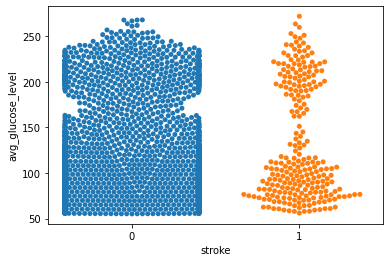

In [26]:
sns.swarmplot(x='stroke', y='avg_glucose_level', data=df)

Text(0.5, 1.0, 'Age Distribution')

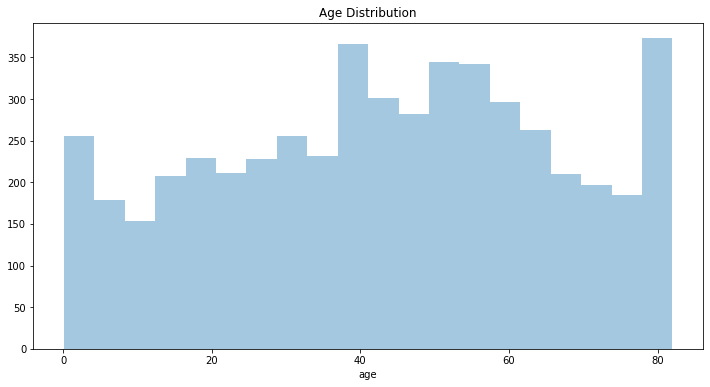

In [27]:
plt.figure(figsize=(12, 6))
sns.distplot(df.age, kde=False)
plt.title("Age Distribution")

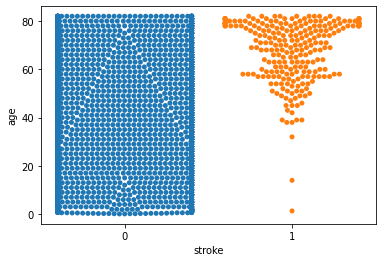

In [28]:
sns.swarmplot(x='stroke', y='age', data=df)

In [29]:
df.loc[df['age'] == 0.08]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [30]:
df['age'].max()

82.0

Overall, it's hard to draw any huge conclusions in relation to stroke prediction from this exploratory analysis (besides age, probably). Although, this is most likely due to the unbalanced data. 

## Split Data

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
X = X.drop('id', axis=1) #drop id column as well to reduce noise
y = df['stroke']


X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [32]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4152,Male,55.0,0,0,Yes,Self-employed,Rural,73.57,28.0,smokes
4051,Male,55.0,0,0,Yes,Govt_job,Urban,231.15,22.3,never smoked
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.0,never smoked
874,Male,80.0,0,0,Yes,Private,Rural,56.99,26.7,never smoked
3534,Female,61.0,0,0,Yes,Private,Urban,108.18,19.1,never smoked
...,...,...,...,...,...,...,...,...,...,...
2895,Male,46.0,0,0,Yes,Private,Urban,137.77,29.3,never smoked
2763,Female,45.0,0,0,Yes,Private,Rural,63.73,32.0,Unknown
905,Female,31.0,0,0,Yes,Private,Rural,76.26,35.6,never smoked
3980,Female,45.0,0,0,Yes,Private,Rural,218.10,55.0,smokes


## Pipeline

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

categorical_cols = [cname for cname in X_train.columns if  
                        X_train[cname].dtype == "object"]


numerical_transformer = SimpleImputer(strategy='median')

#no need to impute because BMI is the only col w missing values
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


log_reg = LogisticRegression(random_state=1)

log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('model', log_reg)
])

log_reg_pipeline.fit(X_train, y_train)

log_reg_preds = log_reg_pipeline.predict(X_val)

print(classification_report(y_val, log_reg_preds))

precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022



As expected, this model is able to predict non-stroke patients fairly well, but, not able to detect stroke patients --- resulting in high accuracy, but low overall recall and precision.


### Upsampling

In [35]:
from sklearn.utils import resample

In [36]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [37]:
df_majority = df[df.stroke == 0]
df_minority = df[df.stroke == 1]

df_minority_upsampled = resample(
    df_minority,
    replace = True,
    n_samples = 4861, #to match majority class
    random_state=1
)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled['stroke'].value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

### Split resampled data

In [38]:
X = df_upsampled.drop('stroke', axis=1)
X = X.drop('id', axis=1) #drop id column as well to reduce noise
y = df_upsampled['stroke']


X_train_up, X_val_up, y_train_up, y_val_up = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

## Logistic Regression with Upsampled Data

In [39]:
log_reg_pipeline.fit(X_train_up, y_train_up)

log_reg_preds_up = log_reg_pipeline.predict(X_val_up)

print(classification_report(y_val_up, log_reg_preds_up))

precision    recall  f1-score   support

           0       0.79      0.74      0.76       975
           1       0.75      0.80      0.77       970

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



As a result of upsampling, we sacrifice some accuracy in exchange for a very nice increase in recall and precision. 

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('model', rf)
])

rf_pipeline.fit(X_train_up, y_train_up)


rf_preds = rf_pipeline.predict(X_val_up)

print(classification_report(y_val_up, rf_preds))

precision    recall  f1-score   support

           0       1.00      0.98      0.99       975
           1       0.98      1.00      0.99       970

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945

